# CHURN PREDICTION

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

In [2]:
client_data = pd.read_csv("./Data/client_data.csv")
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [3]:
price_data = pd.read_csv("./Data/price_data.csv")
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Data Description

In [4]:
client_data.shape

(14606, 26)

In [5]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_data.shape

(193002, 8)

In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Data Statistics

In [8]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Checking Null Values

In [10]:
client_data.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [11]:
price_data.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

### EDA
Conducted a thorough investigation of the dataset using Tableau. The key visualizations and insights from this Tableau-based EDA are embedded below to provide context and support our subsequent modeling efforts.

#### Churn Percent

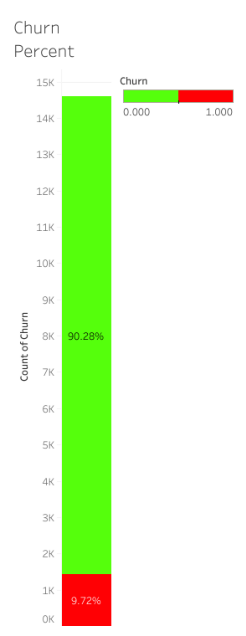

In [12]:
img = mpimg.imread("./images/Churn Percent.png")
plt.figure(figsize=(18,8))
plt.imshow(img)
plt.axis('off')
plt.show()

From the above chart we can see that approximately 10% of the customers are switching

#### Channel Wise Churn Percent

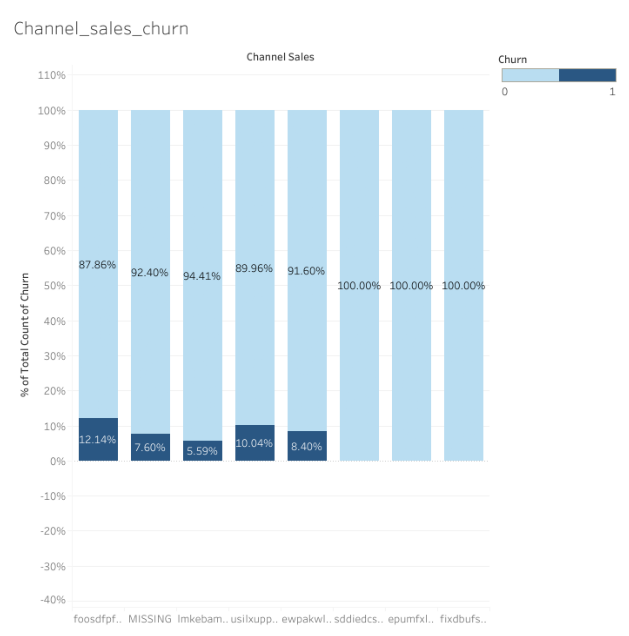

In [13]:
img = mpimg.imread("./images/Channel_sales_churn.png")
plt.figure(figsize=(18,8))
plt.imshow(img)
plt.axis('off')
plt.show()

From the above chart we can see that maximum customers from the "foosdfpfkusacimwkcsosbicdxkicaua" and "usilxuppasemubllopkaafesmlibmsdf" channel

#### Consumption based Churn Percent

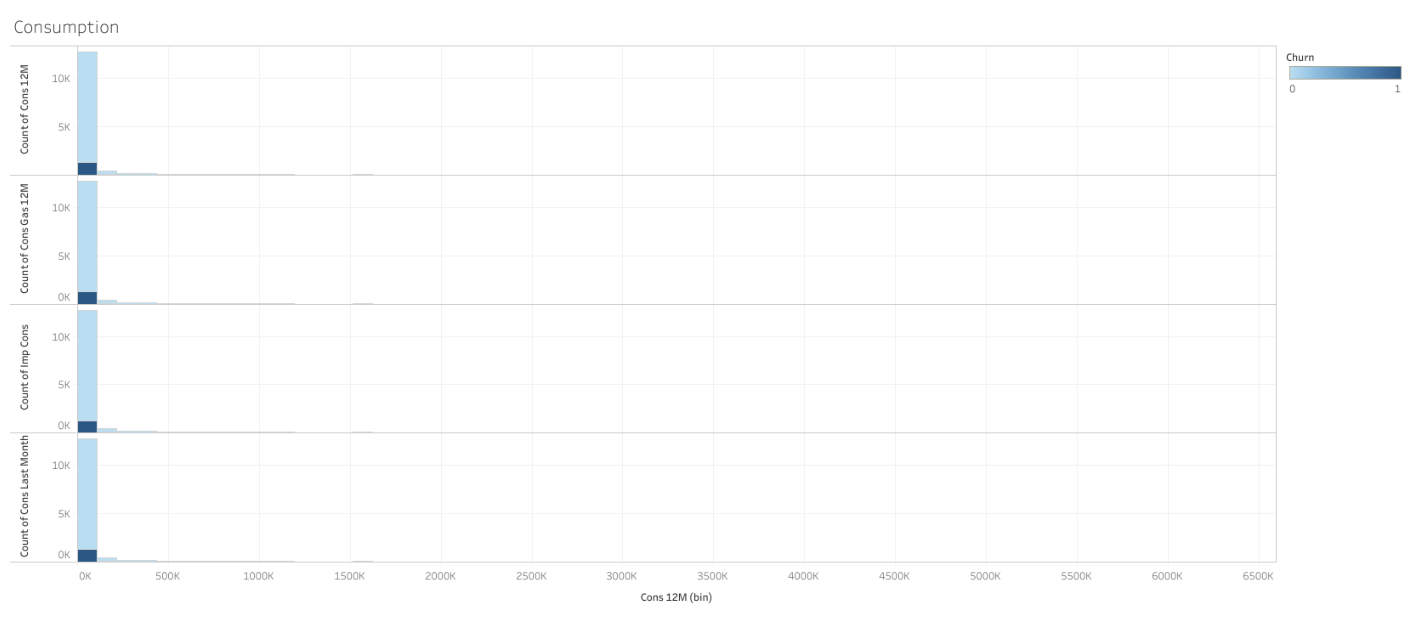

In [14]:
img = mpimg.imread("./images/Consumption.png")
plt.figure(figsize=(18,12))
plt.imshow(img)
plt.axis('off')
plt.show()

From the above chart we can see that customers having consumption between 0 and 100k are switching.

#### Gas Consumer Churn Percent

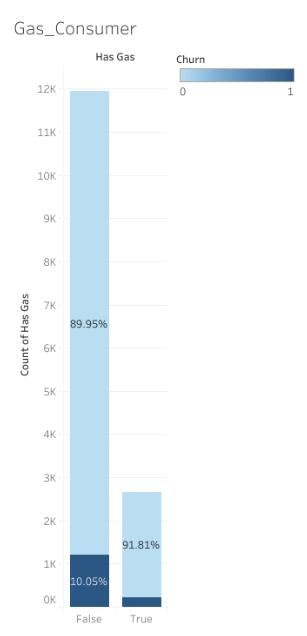

In [15]:
img = mpimg.imread("./images/Gas_Consumer.png")
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

From this chart we can see that customers who take electricity but does not take gas suppy has the higher percent of switching. 

#### Subscribed Power Churn Percent

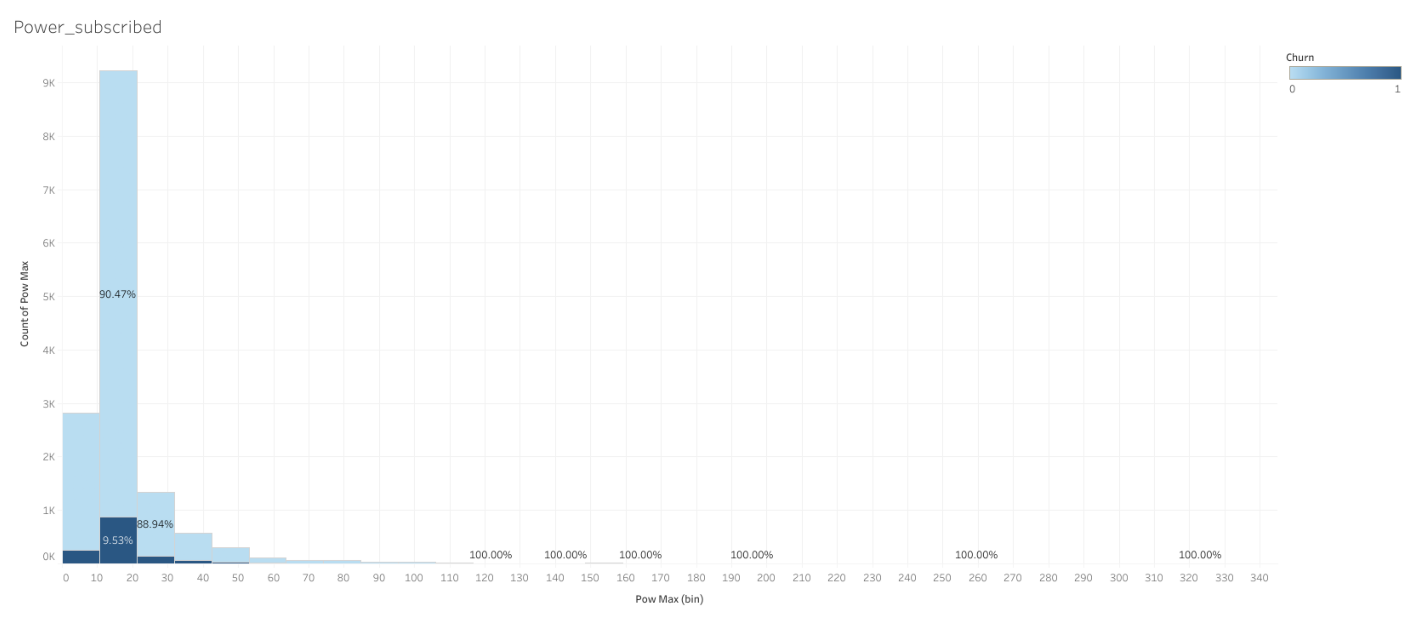

In [16]:
img = mpimg.imread("./images/Power_subscribed.png")
plt.figure(figsize=(18,8))
plt.imshow(img)
plt.axis('off')
plt.show()

From this chart we can see that customers with subscribed power between 10 to 20 are switching.

### Feature Engineering

In [17]:
# Converting date columns to datetime format
date_cols = ['date_activ', 'date_end', 'date_renewal', 'date_modif_prod']
for col in date_cols:
    client_data[col] = pd.to_datetime(client_data[col])

price_data["price_date"] = pd.to_datetime(price_data["price_date"])

##### Difference between off-peak prices in December and preceding January

In [18]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [19]:
df = pd.merge(client_data, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916


##### Average price changes across periods

In [20]:
# Aggregate average prices per period by company
mean_prices = price_data.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [21]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [22]:
columns = ['id', 'off_peak_peak_var_mean_diff','peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff','off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,13.800,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,13.856,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,19.800,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


##### Max price changes across periods and months

In [23]:
# Aggregate average prices per period by company
mean_prices_by_month = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 'price_mid_peak_var': 'mean','price_off_peak_fix': 'mean','price_peak_fix': 'mean','price_mid_peak_fix': 'mean'}).reset_index()

In [24]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [25]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({'off_peak_peak_var_mean_diff': 'max','peak_mid_peak_var_mean_diff': 'max','off_peak_mid_peak_var_mean_diff': 'max','off_peak_peak_fix_mean_diff': 'max','peak_mid_peak_fix_mean_diff': 'max','off_peak_mid_peak_fix_mean_diff': 'max'}).reset_index().rename(columns={'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff','peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff','off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff','off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff','peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff','off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'})

In [26]:
columns = ['id','off_peak_peak_var_max_monthly_diff','peak_mid_peak_var_max_monthly_diff','off_peak_mid_peak_var_max_monthly_diff','off_peak_peak_fix_max_monthly_diff','peak_mid_peak_fix_max_monthly_diff','off_peak_mid_peak_fix_max_monthly_diff']
df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


##### Tenure

In [27]:
df['tenure'] = df.date_end.dt.year - df.date_activ.dt.year

In [28]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.144612
4,0.126383
5,0.099897
13,0.093023
12,0.085106
6,0.075593
7,0.075025
8,0.058065
11,0.052356


##### Transforming dates into months
- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [29]:
def convert_months(reference_date, df, column):
    months = (reference_date.year - df[column].dt.year)*12 + (reference_date.month - df[column].dt.month)
    return months

In [30]:
# Create reference date
reference_date = pd.to_datetime('2016-01-01')

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [31]:
remove = ['date_activ','date_end','date_modif_prod','date_renewal']
df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,31,5,2,7
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,77,7,77,5
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,69,3,69,9
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,70,2,70,10
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,72,2,72,10


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      14606 non-null  object 
 1   channel_sales                           14606 non-null  object 
 2   cons_12m                                14606 non-null  int64  
 3   cons_gas_12m                            14606 non-null  int64  
 4   cons_last_month                         14606 non-null  int64  
 5   forecast_cons_12m                       14606 non-null  float64
 6   forecast_cons_year                      14606 non-null  int64  
 7   forecast_discount_energy                14606 non-null  float64
 8   forecast_meter_rent_12m                 14606 non-null  float64
 9   forecast_price_energy_off_peak          14606 non-null  float64
 10  forecast_price_energy_peak              14606 non-null  fl

In [33]:
df = pd.get_dummies(df, columns=["origin_up"], prefix="origin_up", dtype = int)
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,months_activ,months_to_end,months_modif_prod,months_renewal,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,31,5,2,7,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,77,7,77,5,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,69,3,69,9,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,70,2,70,10,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,72,2,72,10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,4648.01,0,0.0,18.57,0.138305,...,44,4,8,20,0,0,0,0,1,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,631.69,181,0.0,144.03,0.100167,...,41,7,41,5,0,0,0,0,1,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,190.39,179,0.0,129.60,0.116900,...,47,1,47,11,0,0,0,0,1,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,19.34,0,0.0,7.18,0.145711,...,41,7,41,5,0,0,0,0,1,0


In [34]:
df = pd.get_dummies(df, columns=["channel_sales"], prefix="channel_sales", dtype = int)
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,1,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,0,0,0,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,...,1,0,0,0,0,0,1,0,0,0
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,...,1,0,0,0,0,0,1,0,0,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,...,1,0,0,0,0,0,1,0,0,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,...,1,0,0,0,0,0,1,0,0,0


In [35]:
df.has_gas.replace({'f': 0, 't': 1}, inplace=True)
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,1,0,0,0,0,0,1,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,0,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,0,0,0,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,...,1,0,0,0,0,0,1,0,0,0
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,...,1,0,0,0,0,0,1,0,0,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,...,1,0,0,0,0,0,1,0,0,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,...,1,0,0,0,0,0,1,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 53 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  int64  
 2   cons_gas_12m                                    14606 non-null  int64  
 3   cons_last_month                                 14606 non-null  int64  
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  int64  
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

### Modeling the Data

In [37]:
X = df.drop(['id','churn'], axis=1)
X.shape

(14606, 51)

In [38]:
y = df.churn
y.shape

(14606,)

##### Splitting dataset into Training and Testing

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11684, 51)
(2922, 51)
(11684,)
(2922,)


##### Scaling the Data

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Building the ANN Model 

In [42]:
model = Sequential([
    Flatten(),
    Dense(45, activation='relu'),
    Dropout(0.2),
    Dense(35, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [43]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8774 - loss: 0.4030 - val_accuracy: 0.9028 - val_loss: 0.3127
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9077 - loss: 0.3048 - val_accuracy: 0.9028 - val_loss: 0.3097
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9004 - loss: 0.3196 - val_accuracy: 0.9028 - val_loss: 0.3092
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9020 - loss: 0.3110 - val_accuracy: 0.9028 - val_loss: 0.3099
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9056 - loss: 0.3024 - val_accuracy: 0.9028 - val_loss: 0.3106
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9012 - loss: 0.3113 - val_accuracy: 0.9028 - val_loss: 0.3076
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8969 - loss: 0.3205 - val_accuracy: 0.9028 - val_loss: 0.3114
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9012 - loss: 0.3092 - val_accuracy: 0.

In [45]:
y_pred_values = model.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
y_pred = []
for value in y_pred_values:
    if value > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


##### Model Evaluation

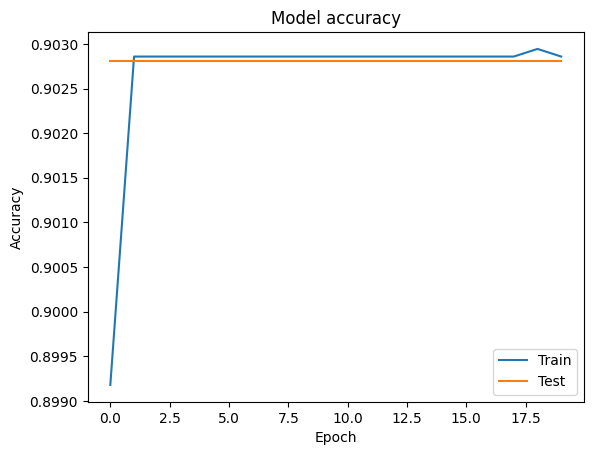

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [48]:
model.evaluate(X_test, y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9005 - loss: 0.3122


[0.30735835433006287, 0.902806282043457]

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2638
           1       0.00      0.00      0.00       284

    accuracy                           0.90      2922
   macro avg       0.45      0.50      0.47      2922
weighted avg       0.82      0.90      0.86      2922



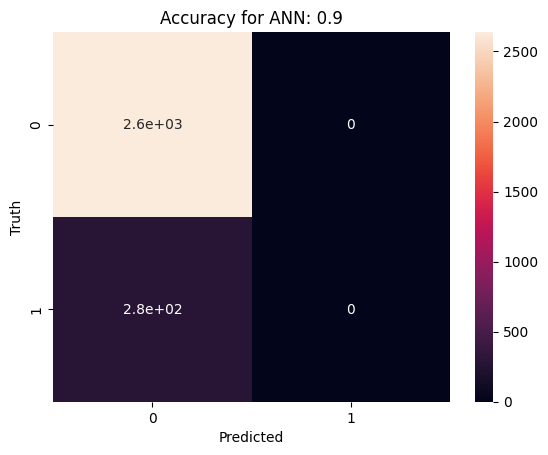

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title(f"Accuracy for ANN: {round(accuracy_score(y_test, y_pred),2)}")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()